# 3. Initial model tuning and feature search

In [1]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score
import pickle


In [2]:
%matplotlib inline
sns.set_palette("Set2")

In [3]:
#load initial cleaned data
df=pd.read_csv(r"..\data\processed\prelim_clean.csv", index_col=[0])

## Drop some more missed features in previous iterations
num of of visits and who referred

In [4]:
df.drop(['NACCNVST','NACCAVST','NACCREFR','CVDIMAG'],inplace=True,axis=1)

## Split dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df['target'], test_size=0.35, random_state=1)

# Finding the model baselines

If we predict that everything is 0 (no AD) what's the result?

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred=dummy_clf.predict(X_test)
print(dummy_clf.score(X_test, y_test))
print(precision_score(y_test,y_pred, labels=np.unique(y_pred)))
recall_score(y_test,y_pred)


If we predict everything randomly, what do we get?

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)
y_pred=dummy_clf.predict(X_test)
print(dummy_clf.score(X_test, y_test))
print(precision_score(y_test,y_pred, labels=np.unique(y_pred)))
recall_score(y_test,y_pred)

If we predict randomly taking into account 'inbalances' (data is not really imbalanced)

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
y_pred=dummy_clf.predict(X_test)
print(dummy_clf.score(X_test, y_test))
print(precision_score(y_test,y_pred, labels=np.unique(y_pred)))
recall_score(y_test,y_pred)

# Untunned Model
## Initialize forest baseline

In [6]:
model = RandomForestClassifier()
#train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7480278422273782
0.7383309759547383


0.5931818181818181

## first pass at the features

In [ ]:
#take 10% of original dataframe to start with, but the forest takes only sqrt
print(df.shape[1]*.1)
print(np.sqrt(df.shape[1]))

[(0.0224, 'MEMUNITS'), (0.0205, 'NEWINF'), (0.0176, 'CDRSUM'), (0.0137, 'LOGIMEM'), (0.0131, 'ORIENT'), (0.0112, 'WEIGHT'), (0.011, 'visit_interval'), (0.011, 'TRAILB'), (0.0109, 'ANIMALS'), (0.0108, 'WAIS'), (0.0104, 'NACCAGEB'), (0.0104, 'NACCAGE'), (0.0104, 'BIRTHYR'), (0.0103, 'INBIRYR'), (0.0102, 'TRAILA'), (0.0102, 'DECAGE'), (0.0101, 'NACCBMI'), (0.0101, 'BPSYS'), (0.0096, 'NACCMMSE'), (0.0095, 'VEG'), (0.0093, 'TAXES'), (0.0092, 'NACCADMD'), (0.009, 'NACCAM'), (0.0089, 'BPDIAS'), (0.0084, 'MEMTIME'), (0.0083, 'HRATE'), (0.0079, 'drug_count'), (0.0079, 'HEIGHT'), (0.0074, 'EDUC'), (0.007, 'NACCAMD'), (0.007, 'BOSTON'), (0.0069, 'REMDATES'), (0.0069, 'CRAFTDRE'), (0.0067, 'UDSBENTD'), (0.0061, 'MEMORY'), (0.0058, 'DIGIB'), (0.0057, 'TRAILBRR'), (0.0056, 'QUITSMOK'), (0.0056, 'NACCGDS'), (0.0055, 'DIGIF'), (0.0054, 'SMOKYRS'), (0.0051, 'BILLS'), (0.005, 'NACCAPOE'), (0.0046, 'NACCNE4S'), (0.0046, 'HOMEHOBB'), (0.0046, 'CRAFTVRS'), (0.0045, 'PACKSPER'), (0.0045, 'NACCBEHF'), (0.004

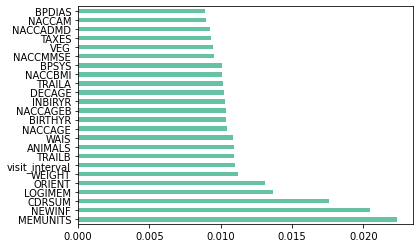

In [7]:
#Features sorted by their score
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(24).plot(kind='barh')
cols=X_train.columns
print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), cols), 
             reverse=True))

## Model with 10% feats

In [8]:
restrict=feat_importances.nlargest(56).index
res=df[restrict.to_list()]
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

In [9]:
model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7522041763341067
0.738950276243094


0.6079545454545454

## Model with sqrt # of feats

In [10]:
restrict=feat_importances.nlargest(24).index
res=df[restrict.to_list()]
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

In [11]:
model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7238979118329466
0.6981919332406119


0.5704545454545454

## Model with 100 feats

In [12]:
restrict=feat_importances.nlargest(100).index
res=df[restrict.to_list()]
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7559164733178654
0.75


0.6034090909090909

# Exploring top 10% features further

In [25]:
#normalized count function because libraries suck
def norm_count_single(df, column, target):
    c=column
    df1 = df.groupby(target)[c].value_counts(normalize=True)
    df1 = df1.rename('norm').reset_index()
    sns.barplot(x=c,y='norm',hue=target,data=df1)
    
def norm_count_group(df, target):    
    ix = 1
    fig = plt.figure(figsize = (15,10))
    for c in list(df.columns):
        if ix <= 3:
            if c != target:
                ax1 = fig.add_subplot(1,3,ix)
                df1 = df.groupby(target)[c].value_counts(normalize=True)
                df1 = df1.rename('norm').reset_index()
                sns.barplot(x=c,y='norm',hue=target,data=df1,ax = ax1)
                plt.xticks(rotation=45)

        ix = ix +1
        if ix == 4: 
            fig = plt.figure(figsize = (15,10))
            ix =1

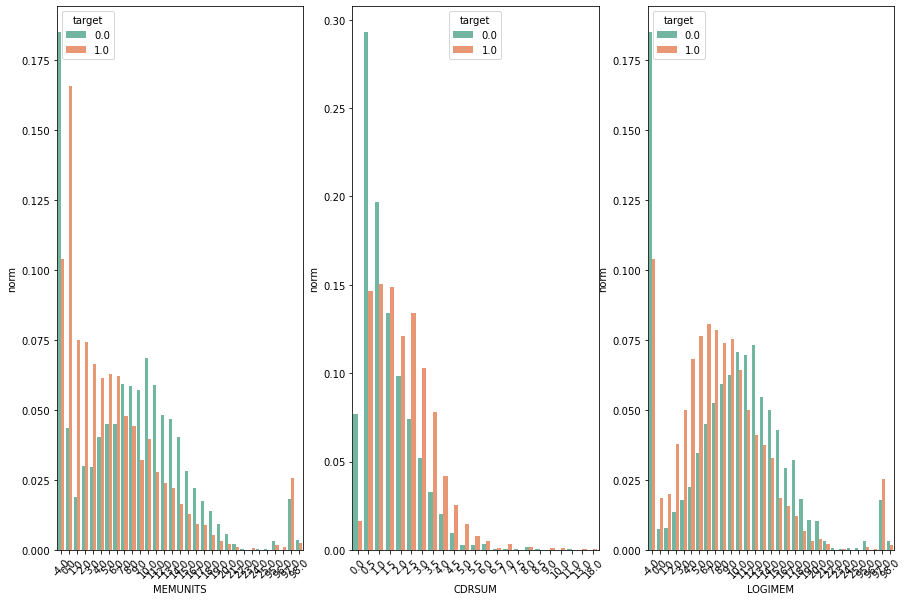

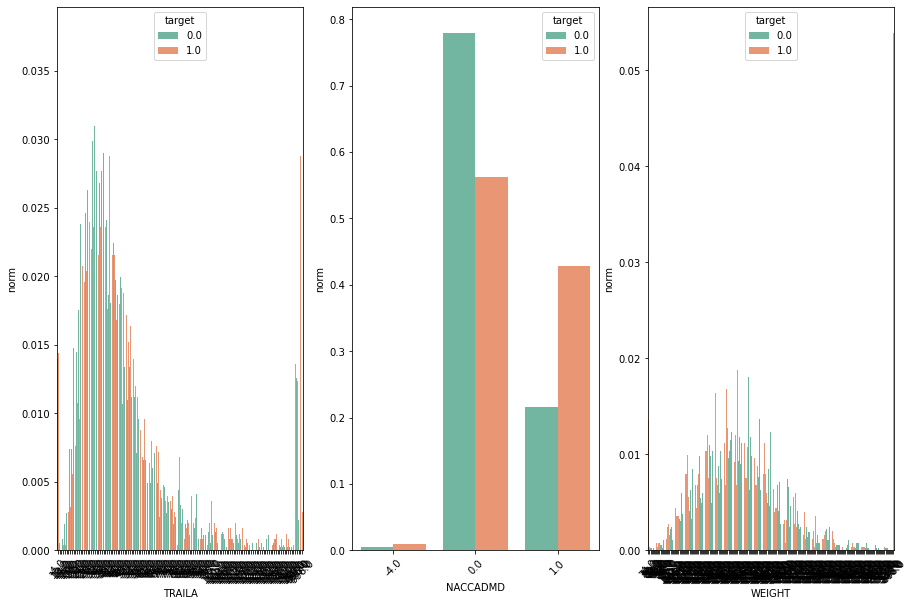

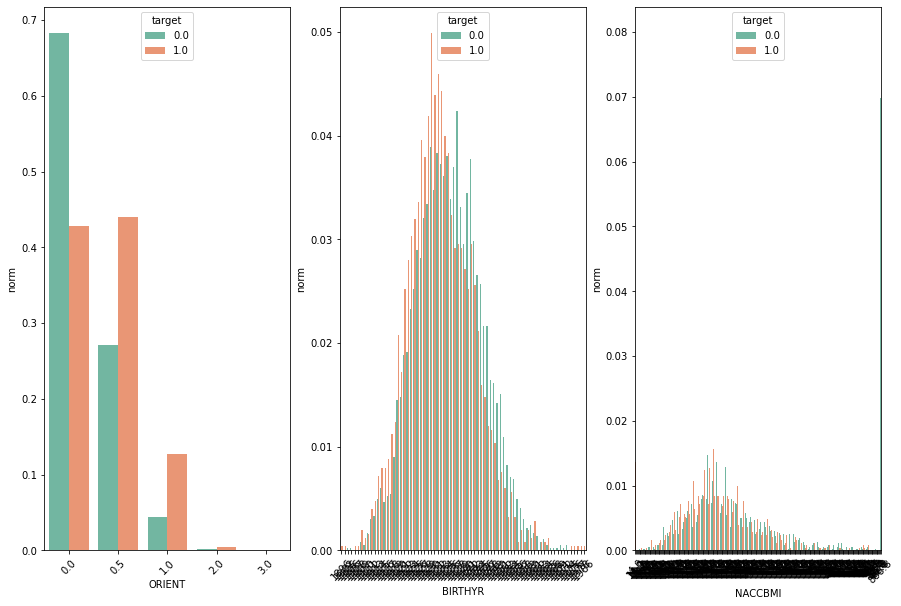

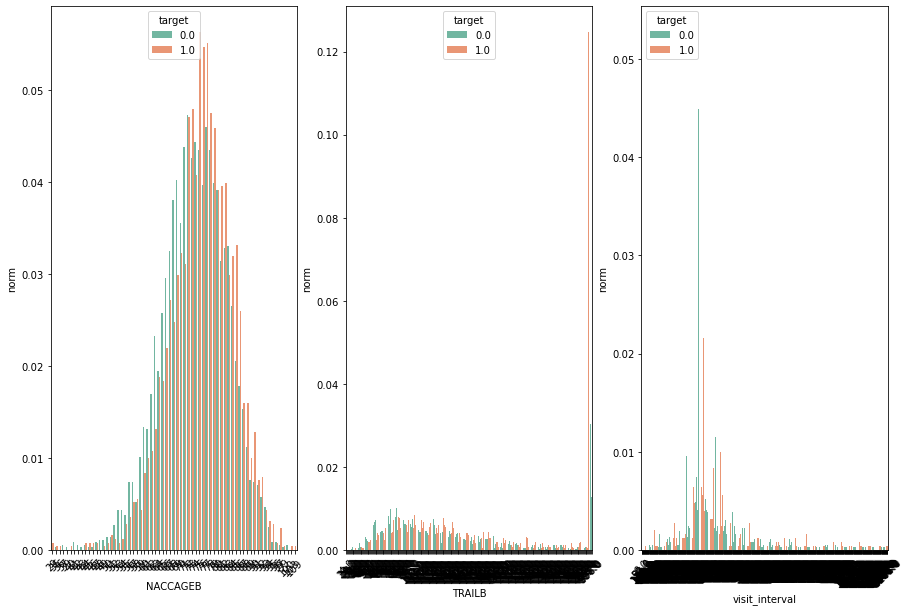

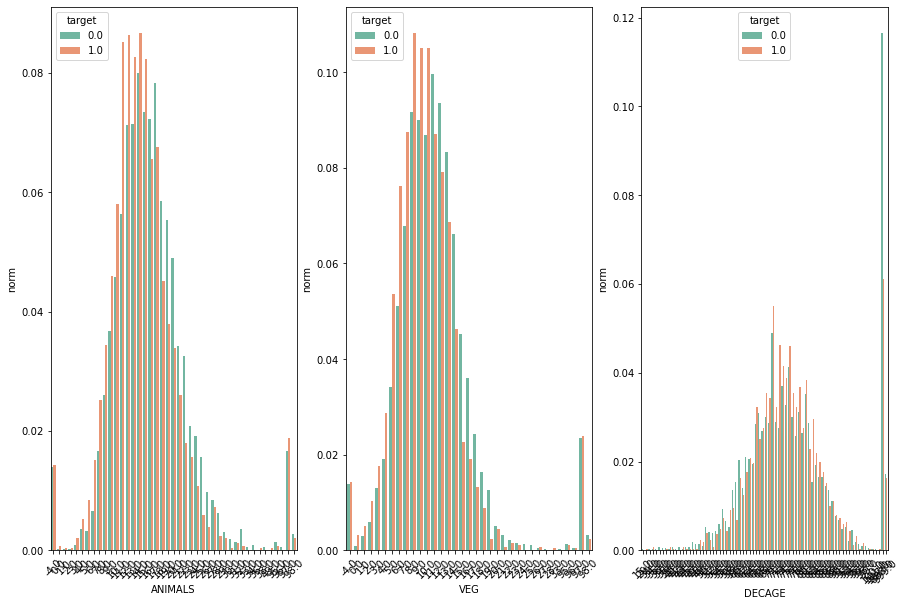

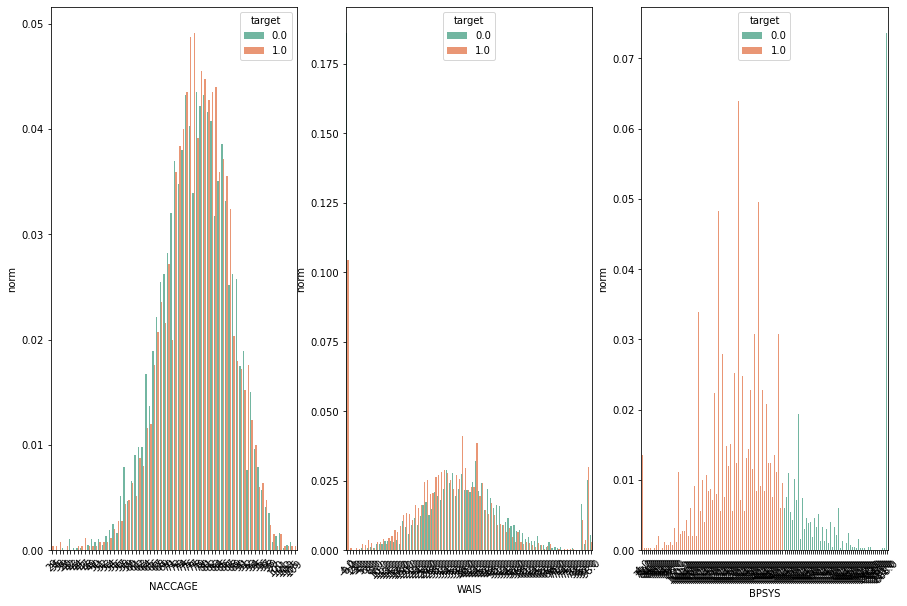

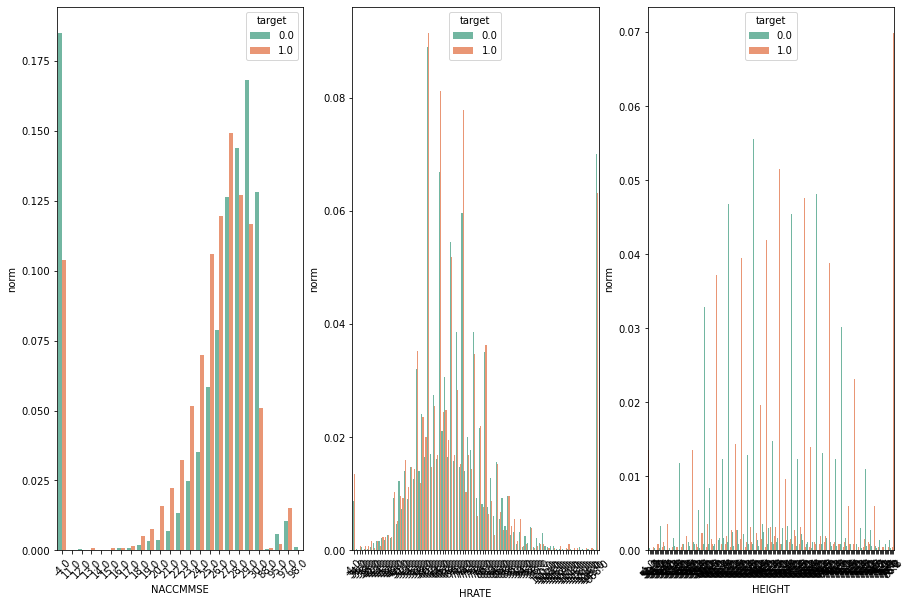

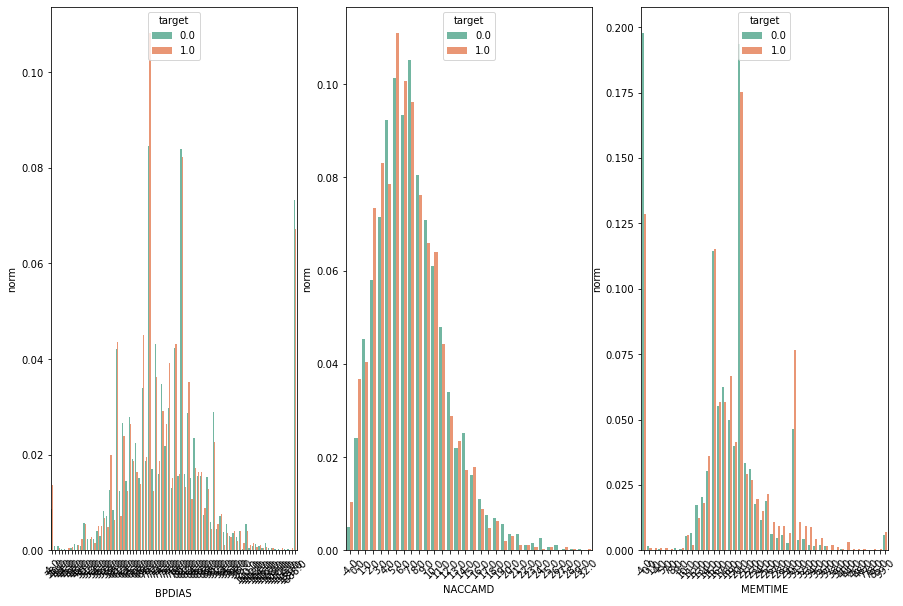

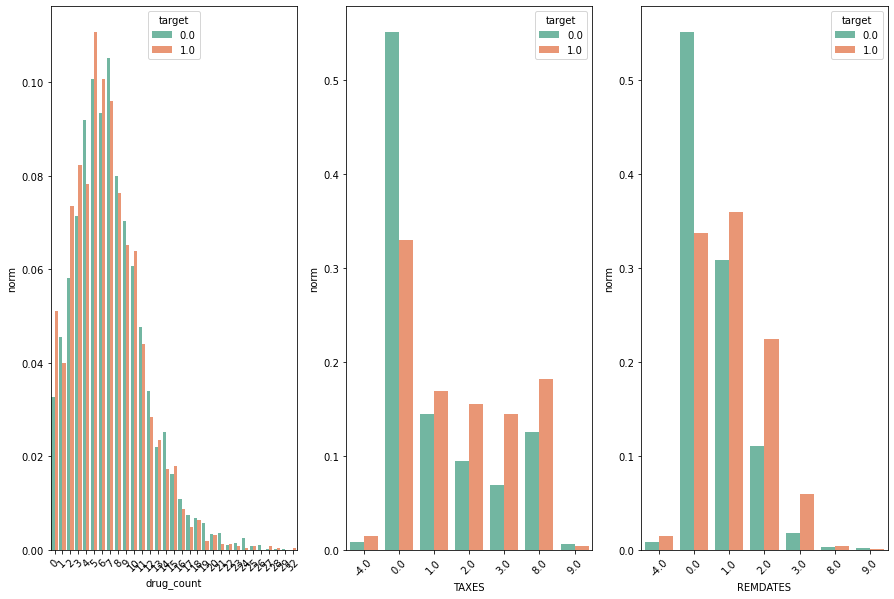

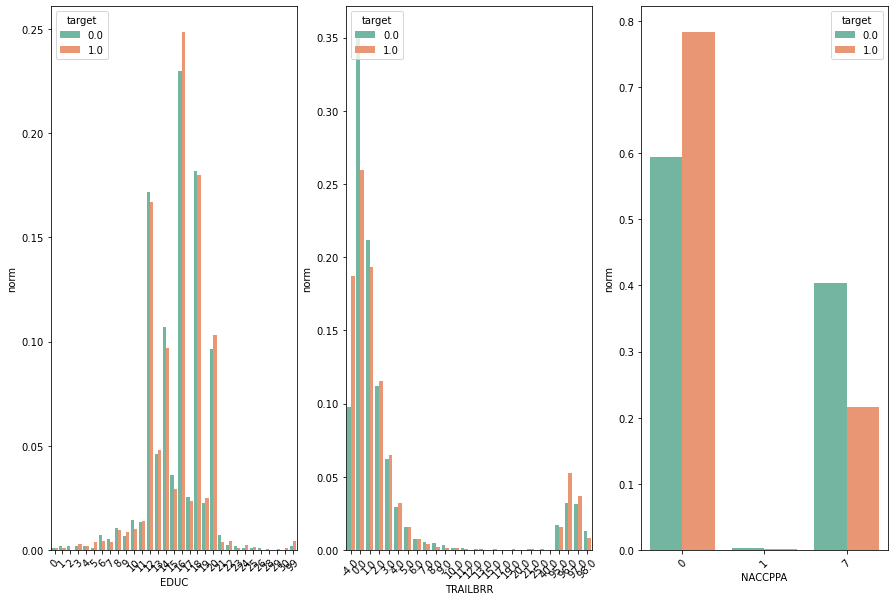

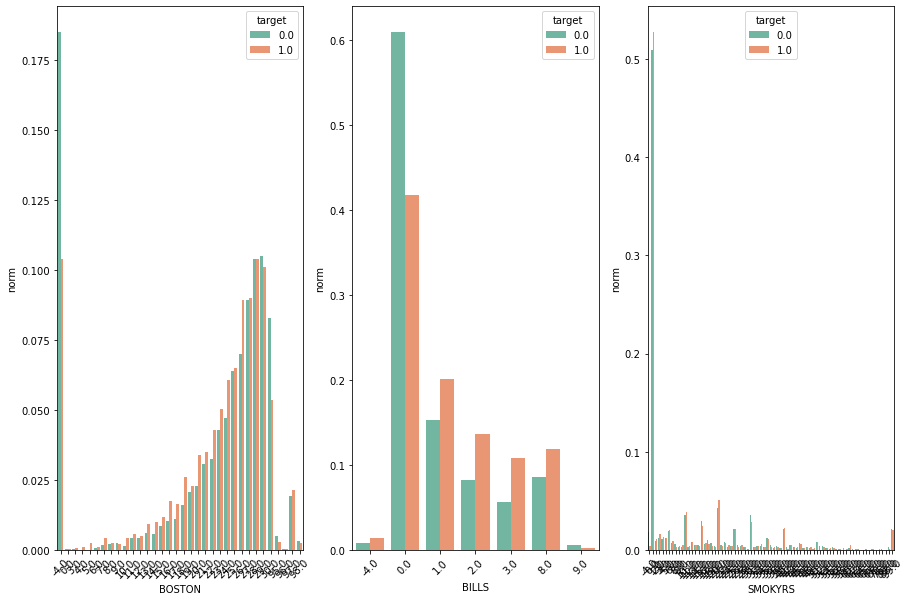

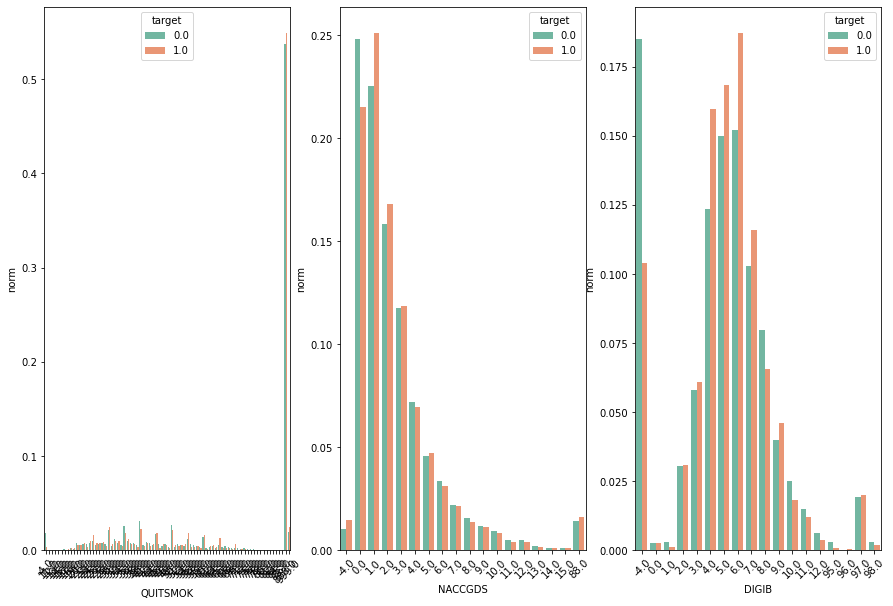

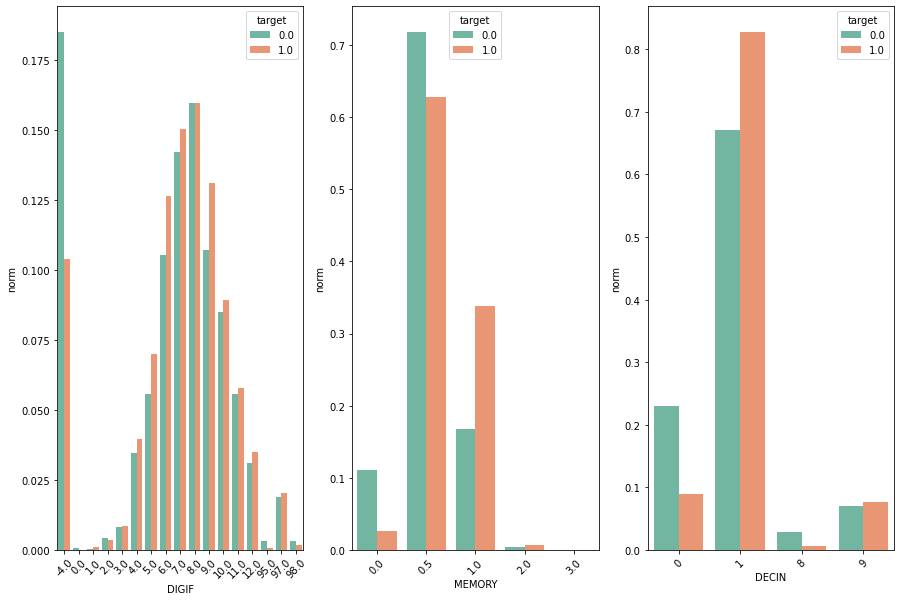

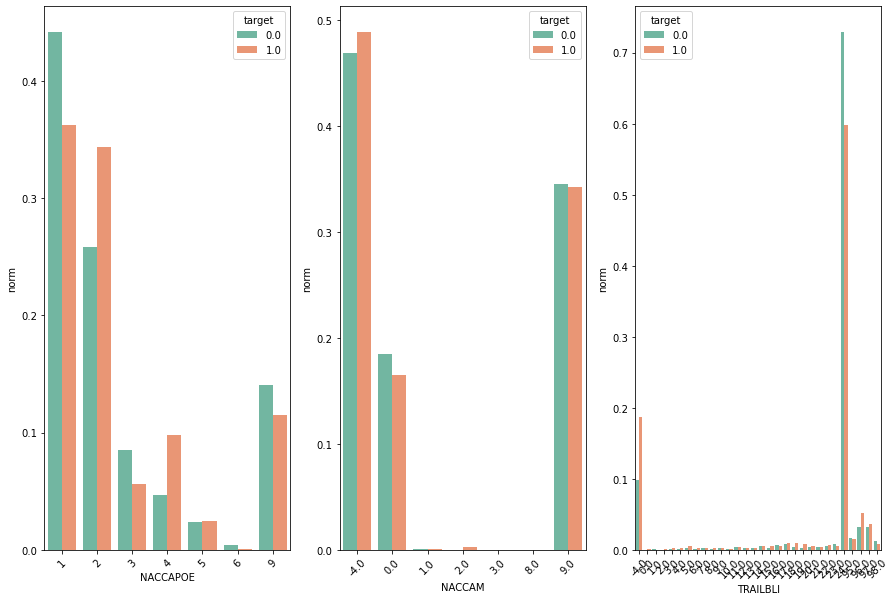

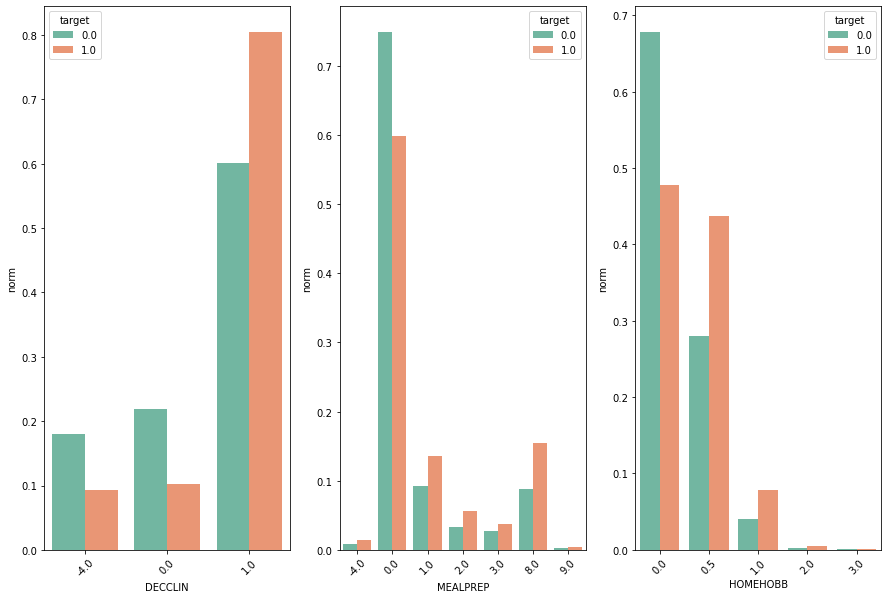

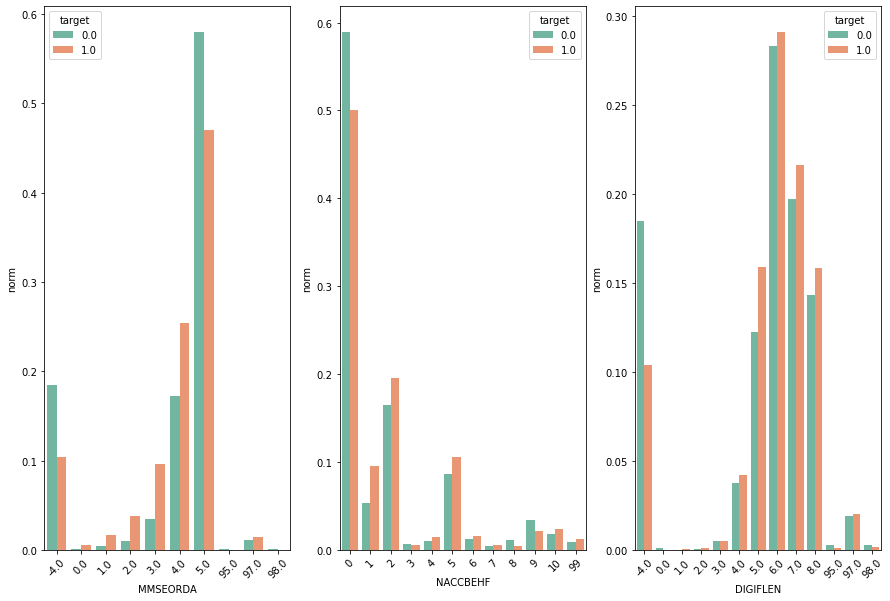

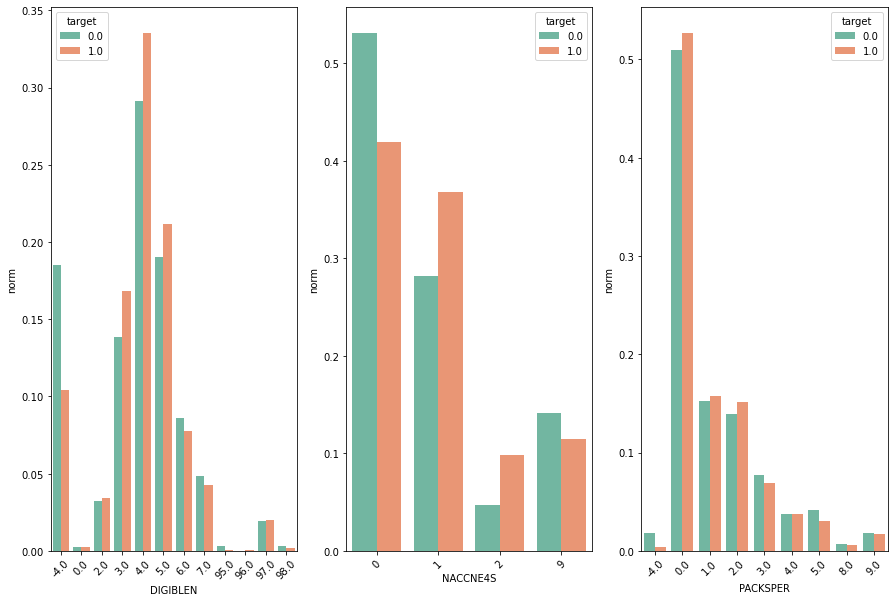

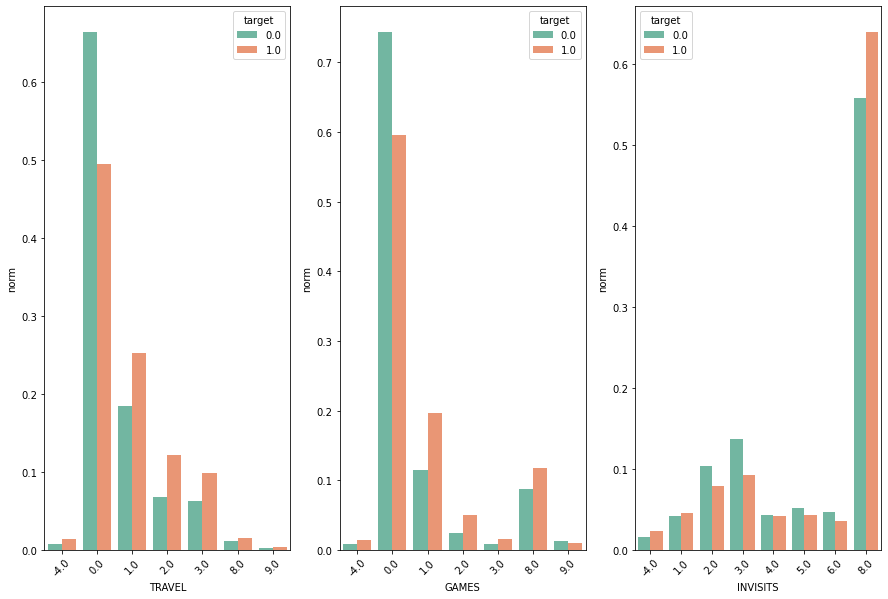

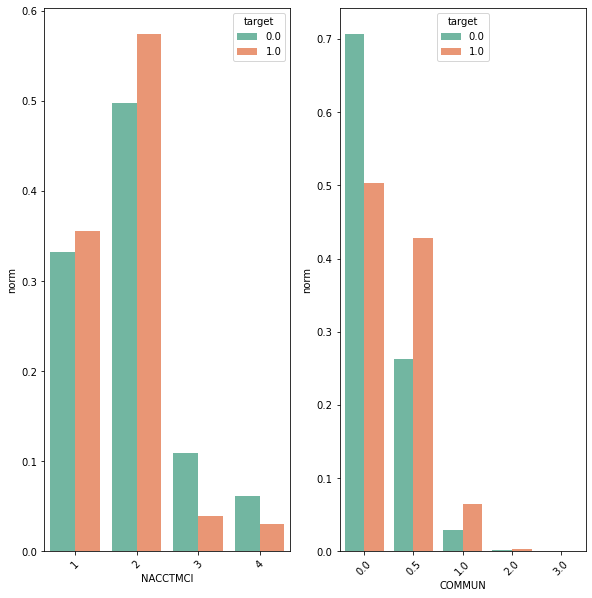

<Figure size 1080x720 with 0 Axes>

In [26]:
restrict=feat_importances.nlargest(56).index
res=df[restrict.to_list()]

temp=res.copy()
temp['target']=df['target']
norm_count_group(temp,'target')

## Let's do some tests without coparticipant info as this data may be biased/not usually collected

0.7429234338747099
0.7335243553008596
0.5818181818181818


<AxesSubplot:>

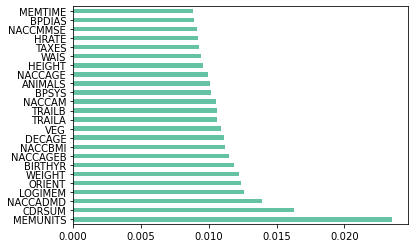

In [27]:
res=df.drop(['NEWINF','INBIRYR','target','visit_interval'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


#Features sorted by their score
feat_importances = pd.Series(model_feat1.feature_importances_, index=X_train.columns)
feat_importances.nlargest(24).plot(kind='barh')

Precision is lower but overall works fine, let's take these out permanently

In [21]:
new_df=df.drop(['NEWINF','INBIRYR','NAMNDEM','NACCACTV','NACCNMRI','DEMUN'], axis=1)
new_df=new_df.loc[:,~new_df.columns.str.startswith('CVDIMAG')]

## What's the performance if we drop tests that have >50% null

In [22]:
restricted = new_df.loc[:,~new_df.eq(-4).sum().gt(len(df)/2)]
restricted

,BIRTHYR,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,MARISTAT,NACCLIVS,...,NACCPCSF,NACCTCSF,NACCMRSA,NACCAPSA,NACCNAPA,NACCAPOE,NACCNE4S,visit_interval,target,drug_count
0,1920,0,88,5,88,88,1,15,1,2,...,0,0,0,0,0,1,0,427.0,1.0,5
1,1939,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,2,1,474.0,1.0,4
2,1932,0,88,5,88,88,3,20,1,2,...,0,0,0,0,0,1,0,413.0,1.0,7
4,1935,0,88,1,88,88,1,24,2,1,...,0,0,0,0,0,1,0,327.0,1.0,8
5,1935,0,88,1,88,88,1,20,2,1,...,0,0,0,0,0,2,1,264.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,1921,0,88,1,88,88,1,12,1,2,...,0,0,0,0,0,9,9,370.0,0.0,9
18761,1951,0,88,1,88,88,1,16,1,2,...,0,0,1,0,0,2,1,723.0,0.0,5
18764,1930,0,88,1,88,88,1,16,1,3,...,0,0,0,0,0,1,0,351.0,0.0,3
18767,1928,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,1,0,315.0,0.0,7


Initial model without coparticipants & visit interval, + dropped nan columns

0.7345707656612529
0.7291666666666666
0.5568181818181818


<AxesSubplot:>

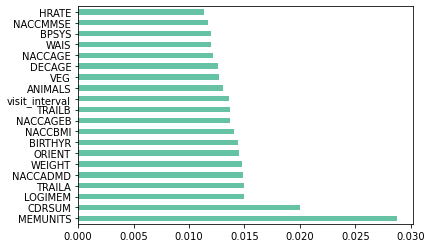

In [23]:
res=restricted.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


#Features sorted by their score
feat_importances = pd.Series(model_feat1.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

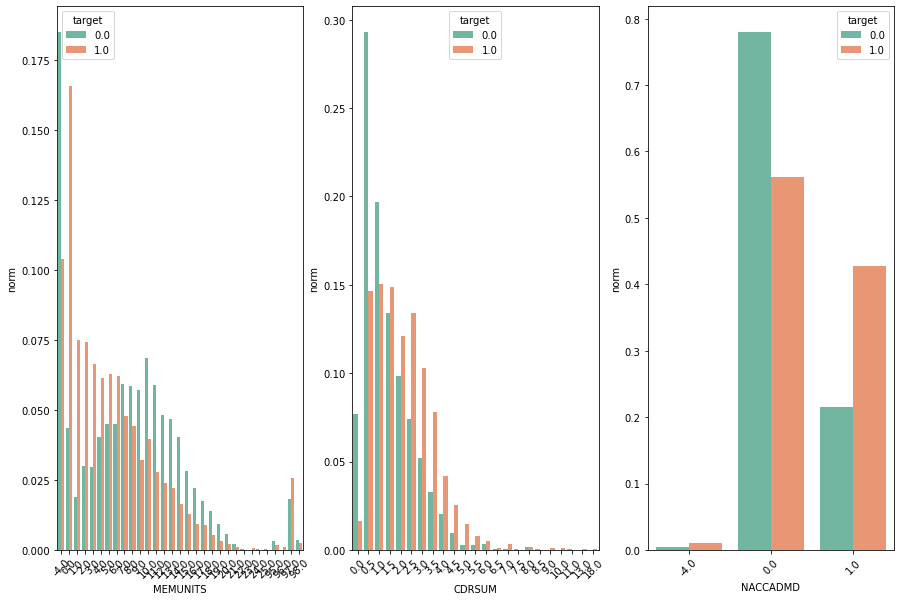

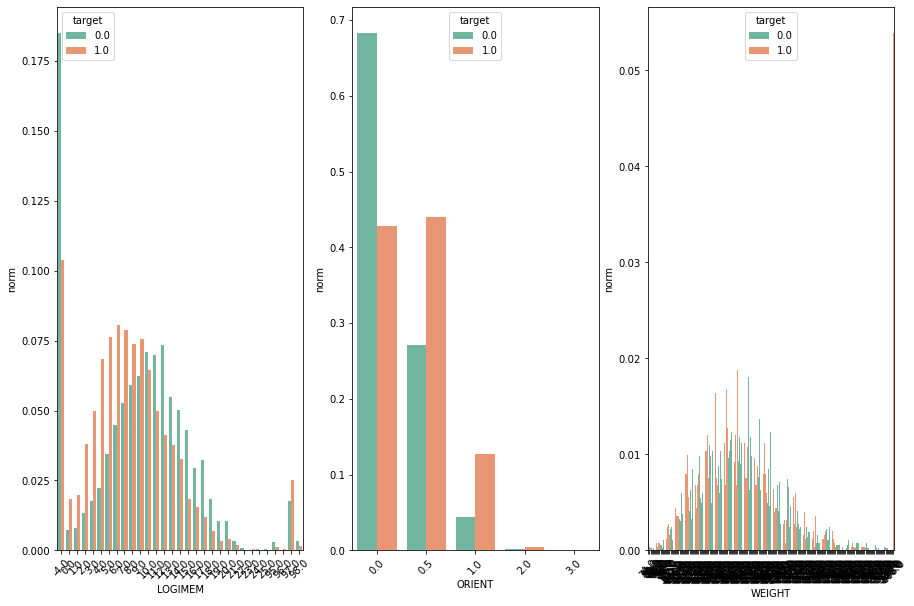

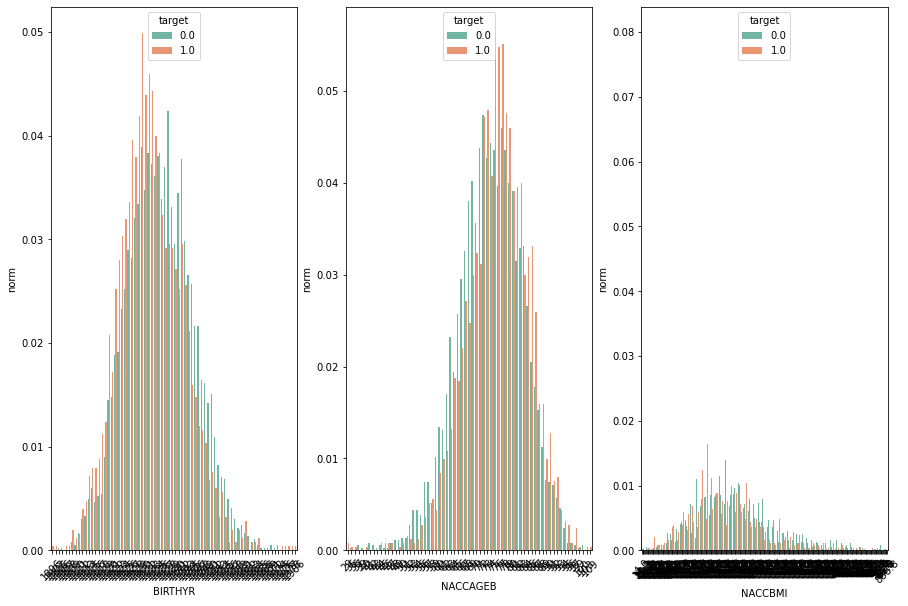

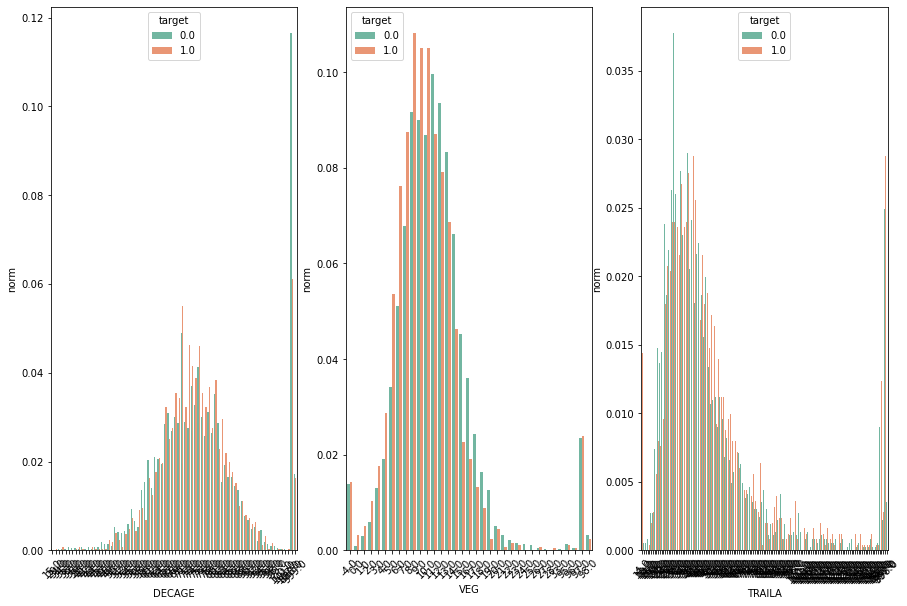

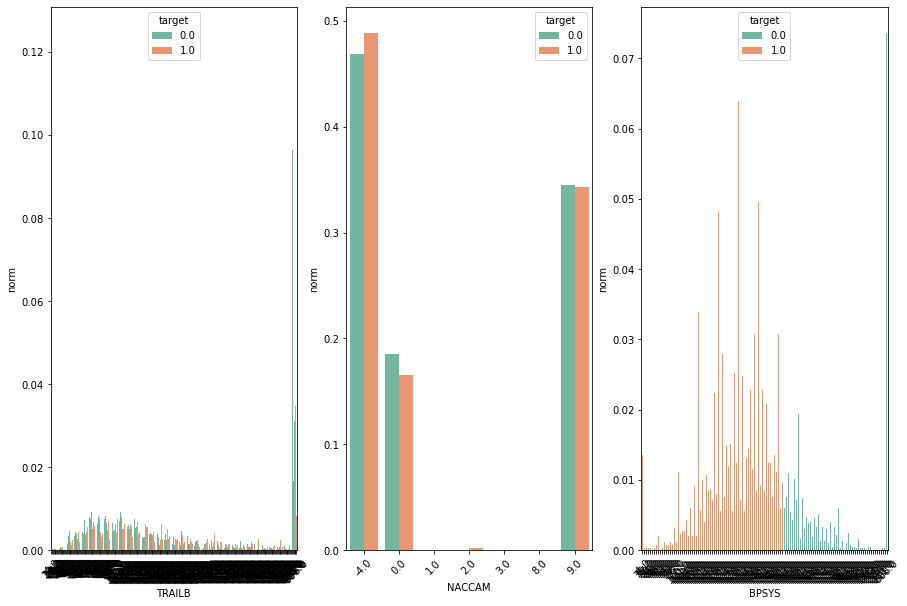

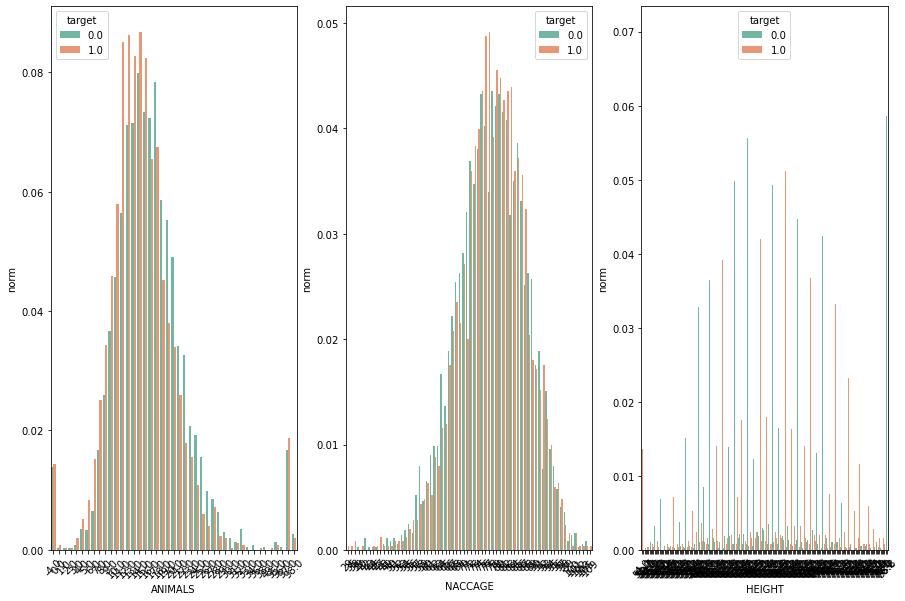

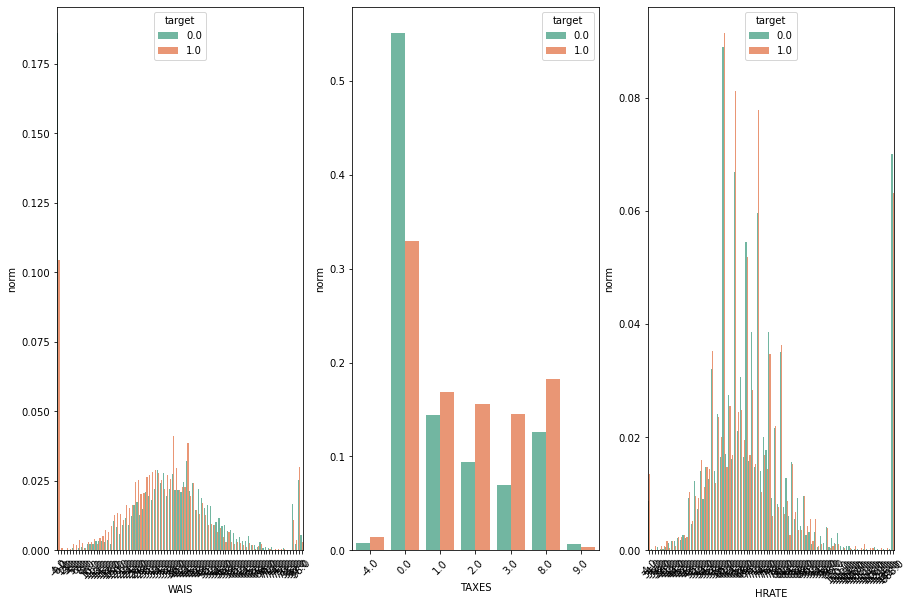

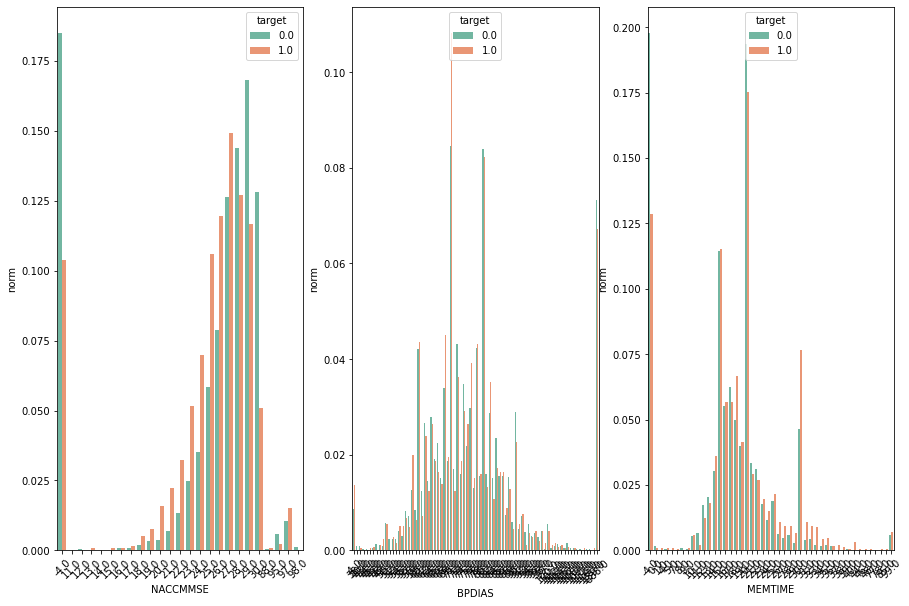

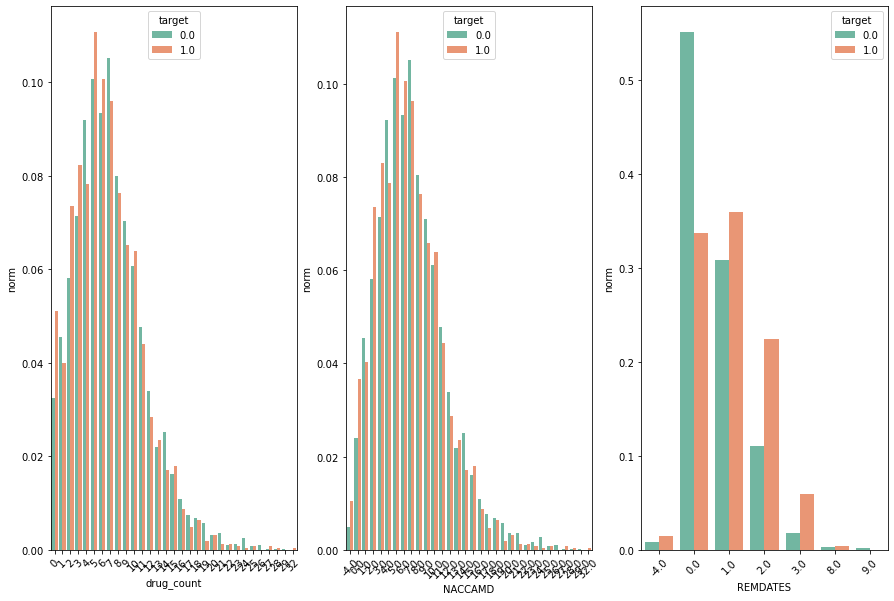

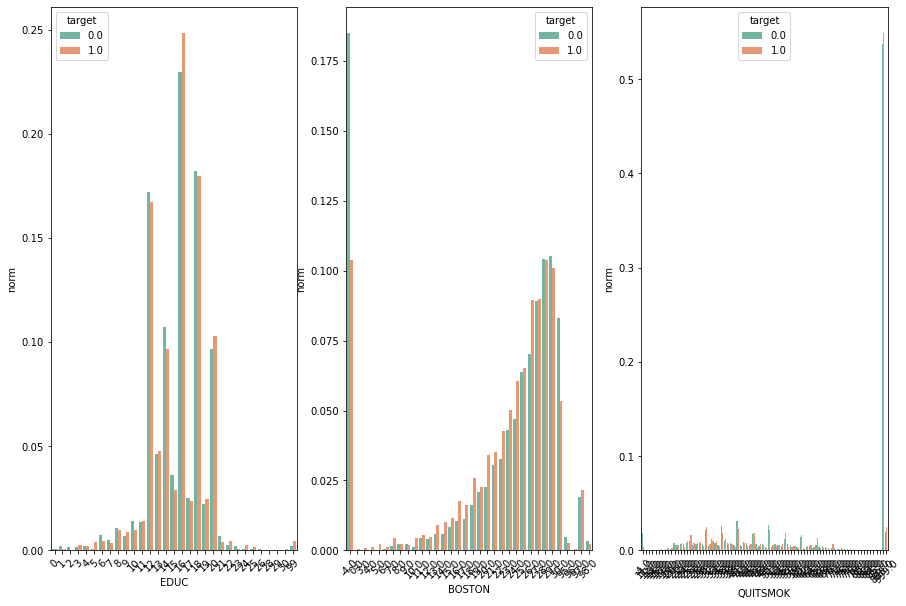

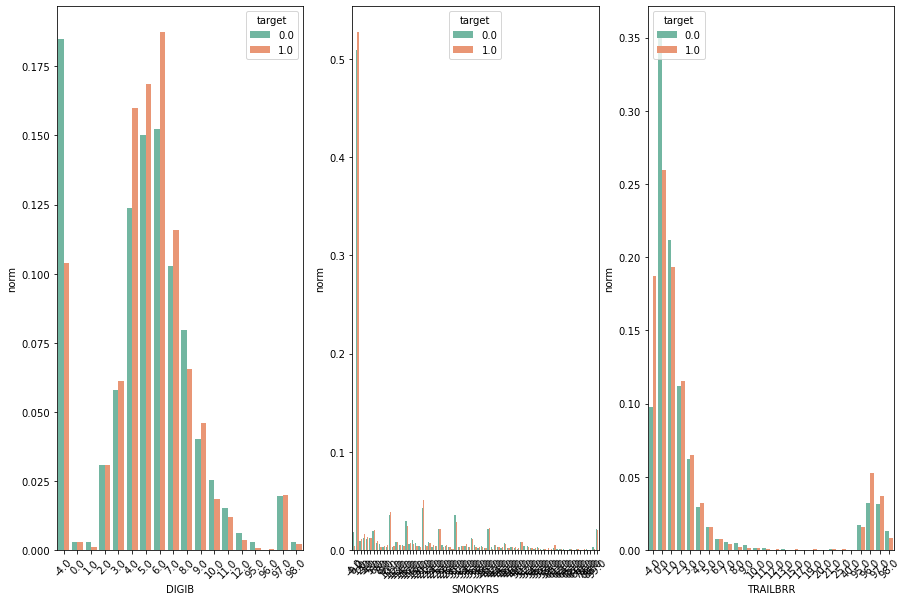

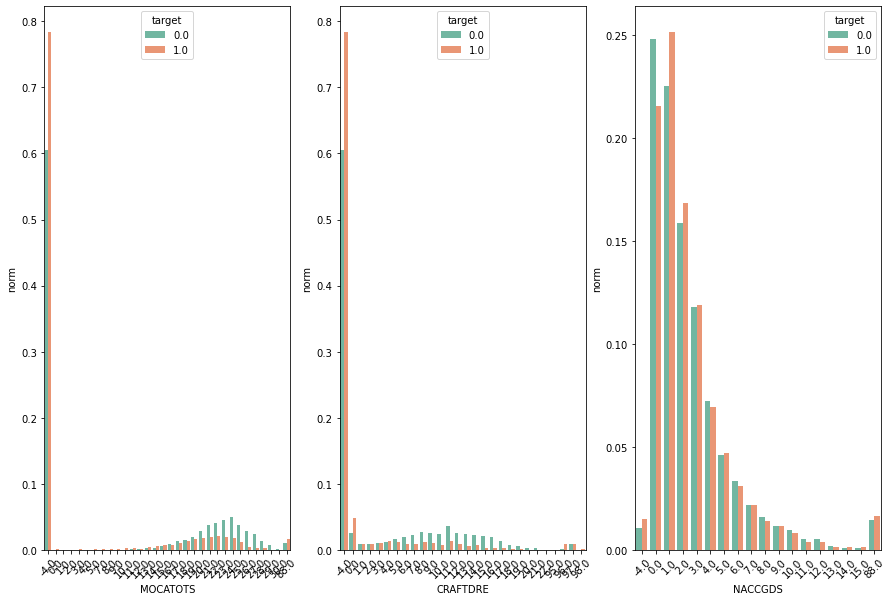

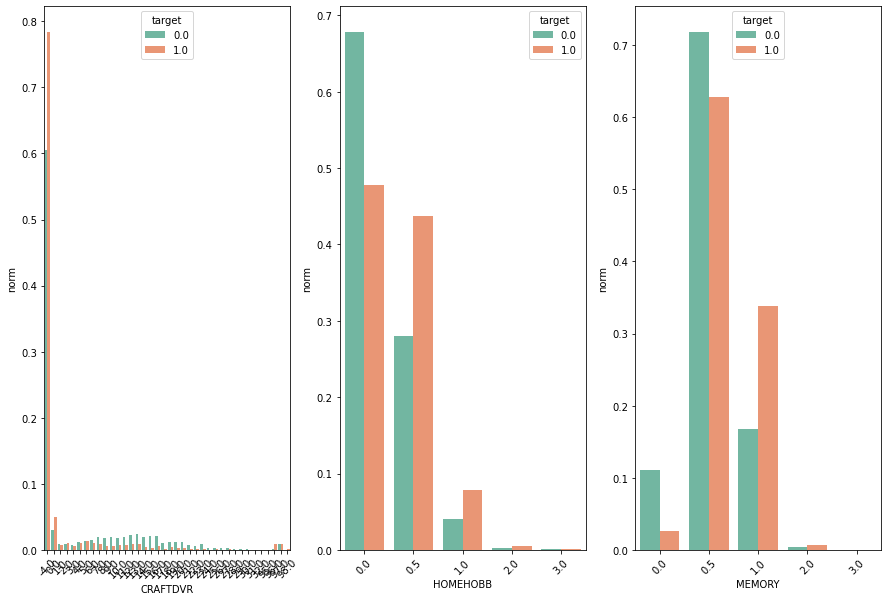

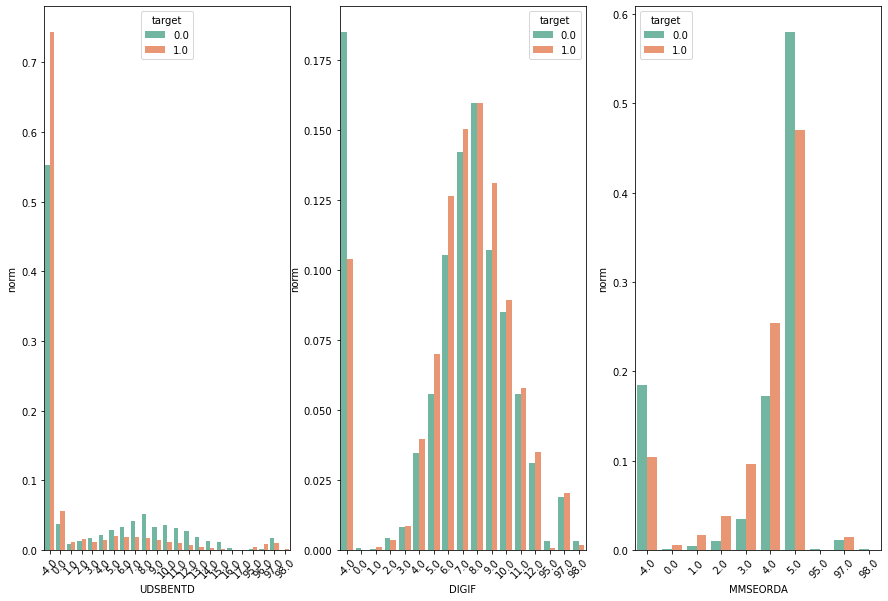

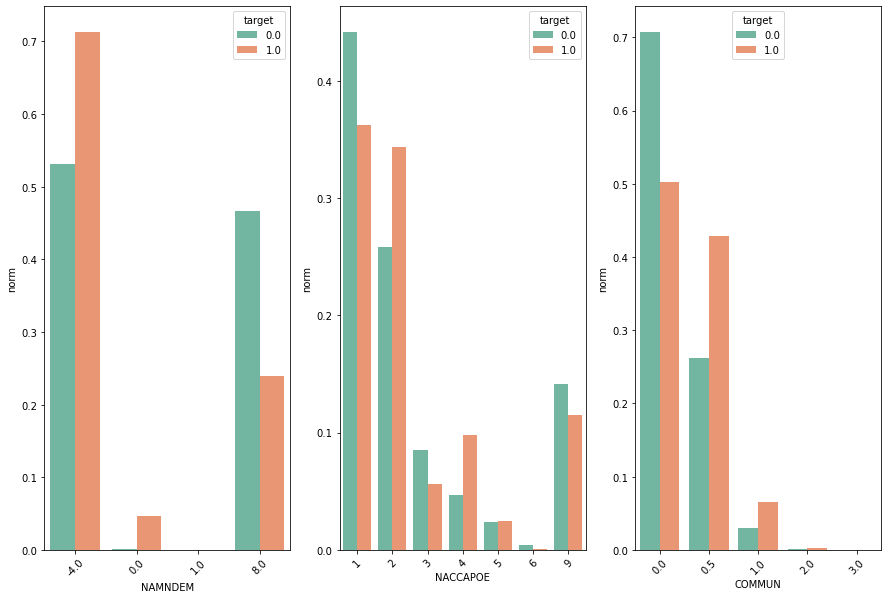

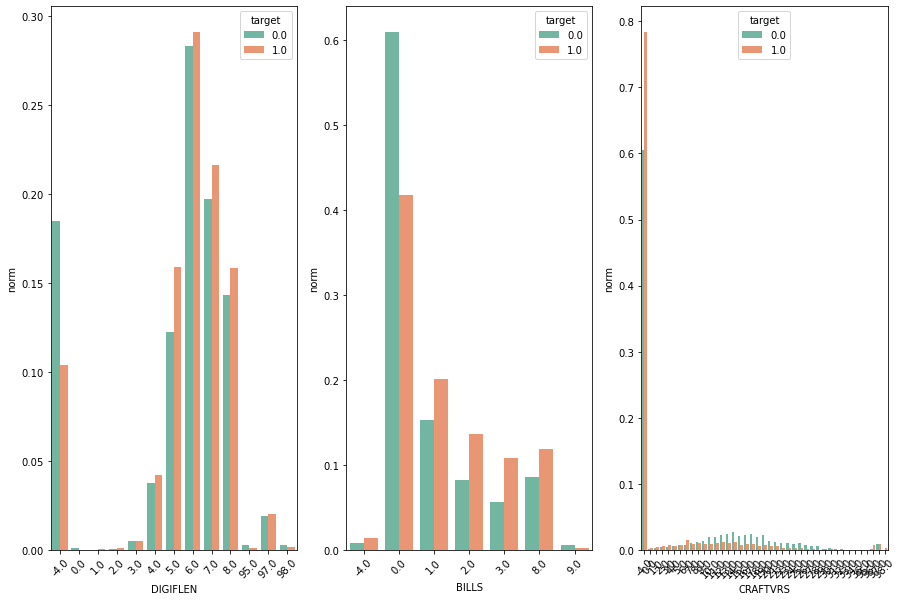

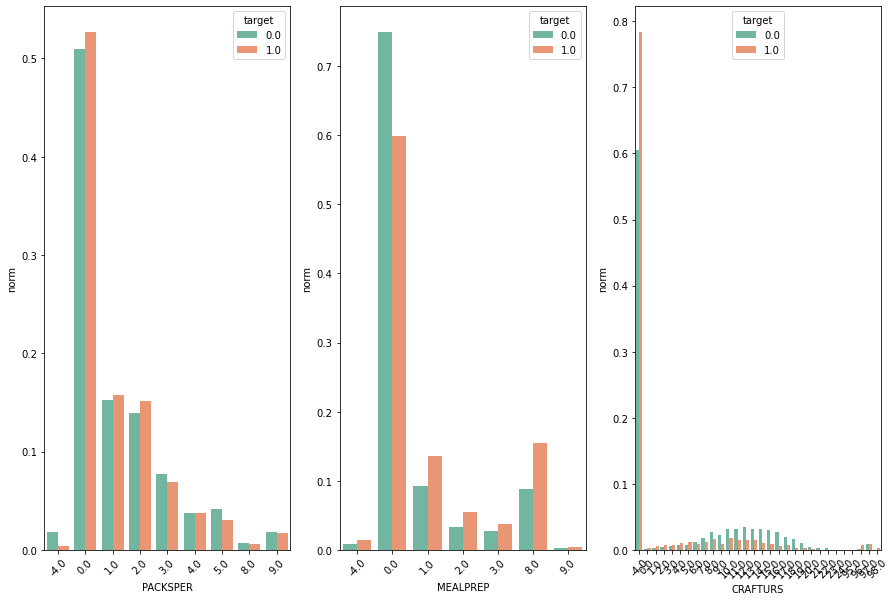

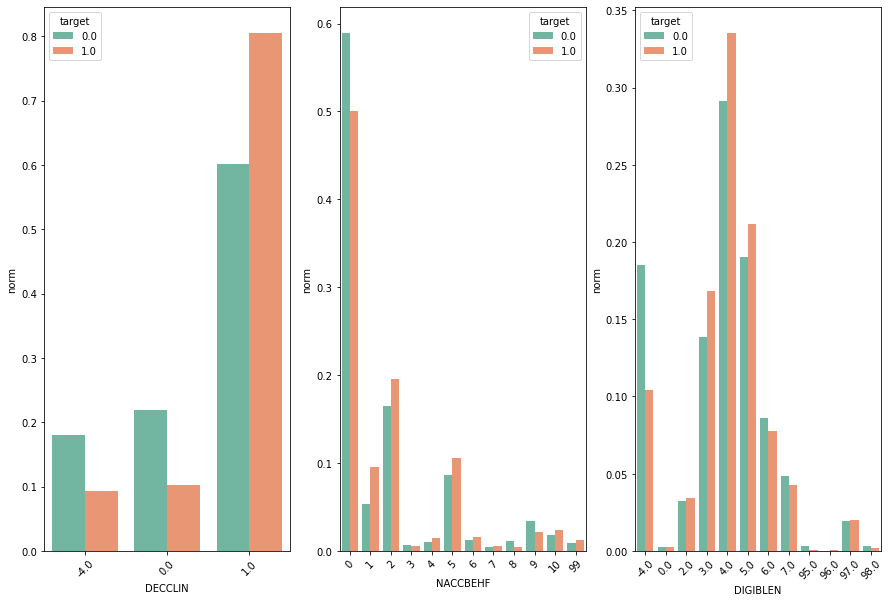

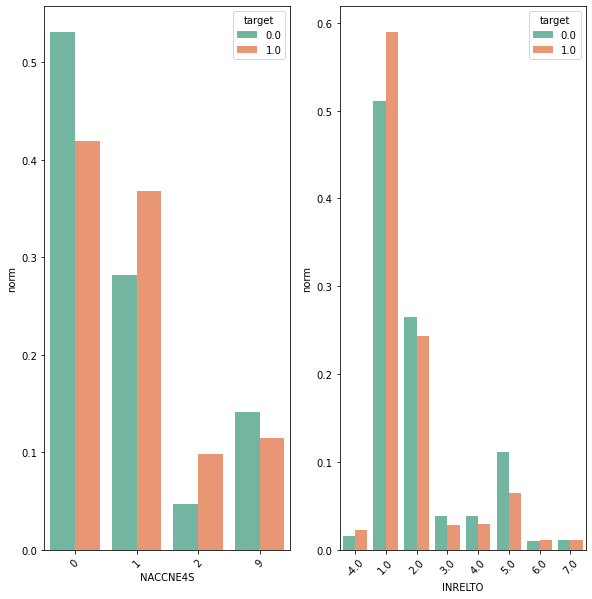

<Figure size 1080x720 with 0 Axes>

In [28]:
restrict=feat_importances.nlargest(56).index
dfres=res[restrict.to_list()]
temp=dfres.copy()
temp['target']=df['target']
norm_count_group(temp,'target')

## What if we drop the patient subset instead?

In [29]:
restricted = new_df.loc[new_df.LOGIMEM!=-4]
restricted

,BIRTHYR,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,MARISTAT,NACCLIVS,...,NACCPCSF,NACCTCSF,NACCMRSA,NACCAPSA,NACCNAPA,NACCAPOE,NACCNE4S,visit_interval,target,drug_count
0,1920,0,88,5,88,88,1,15,1,2,...,0,0,0,0,0,1,0,427.0,1.0,5
2,1932,0,88,5,88,88,3,20,1,2,...,0,0,0,0,0,1,0,413.0,1.0,7
4,1935,0,88,1,88,88,1,24,2,1,...,0,0,0,0,0,1,0,327.0,1.0,8
5,1935,0,88,1,88,88,1,20,2,1,...,0,0,0,0,0,2,1,264.0,1.0,2
6,1944,0,88,1,88,88,1,16,5,3,...,0,0,0,0,0,2,1,438.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18756,1923,0,88,1,88,88,1,15,1,2,...,0,0,0,0,0,9,9,476.0,0.0,5
18759,1921,0,88,1,88,88,1,12,1,2,...,0,0,0,0,0,9,9,370.0,0.0,9
18764,1930,0,88,1,88,88,1,16,1,3,...,0,0,0,0,0,1,0,351.0,0.0,3
18767,1928,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,1,0,315.0,0.0,7


0.7235905856595511
0.720863309352518
0.6169950738916257


<AxesSubplot:>

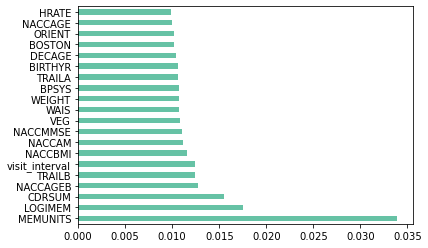

In [30]:
res=restricted.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(res, restricted['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


#Features sorted by their score
feat_importances = pd.Series(model_feat1.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

plot these variables

In [19]:
restrict=feat_importances.nlargest(56).index
dfres=res[restrict.to_list()]
temp=dfres.copy()
temp['target']=df['target']
norm_count_group(temp,'target')

NameError: name 'norm_count_group' is not defined

## Model combining row removal followed by col drop

In [31]:
restricted = new_df.loc[new_df.LOGIMEM!=-4]
restricted = restricted.loc[:,~restricted.eq(-4).sum().gt(len(df)/2)]
restricted

,BIRTHYR,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,MARISTAT,NACCLIVS,...,NACCPCSF,NACCTCSF,NACCMRSA,NACCAPSA,NACCNAPA,NACCAPOE,NACCNE4S,visit_interval,target,drug_count
0,1920,0,88,5,88,88,1,15,1,2,...,0,0,0,0,0,1,0,427.0,1.0,5
2,1932,0,88,5,88,88,3,20,1,2,...,0,0,0,0,0,1,0,413.0,1.0,7
4,1935,0,88,1,88,88,1,24,2,1,...,0,0,0,0,0,1,0,327.0,1.0,8
5,1935,0,88,1,88,88,1,20,2,1,...,0,0,0,0,0,2,1,264.0,1.0,2
6,1944,0,88,1,88,88,1,16,5,3,...,0,0,0,0,0,2,1,438.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18756,1923,0,88,1,88,88,1,15,1,2,...,0,0,0,0,0,9,9,476.0,0.0,5
18759,1921,0,88,1,88,88,1,12,1,2,...,0,0,0,0,0,9,9,370.0,0.0,9
18764,1930,0,88,1,88,88,1,16,1,3,...,0,0,0,0,0,1,0,351.0,0.0,3
18767,1928,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,1,0,315.0,0.0,7


0.715927750410509
0.7183308494783904
0.5935960591133005


<AxesSubplot:>

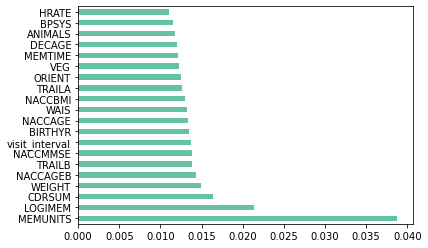

In [32]:
res=restricted.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(res, restricted['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


#Features sorted by their score
feat_importances = pd.Series(model_feat1.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

The droped rows method is best, lets save this new df

In [ ]:
# restricted = new_df.loc[new_df.LOGIMEM!=-4]
# restricted.to_csv('..\data\processed\prelim_clean2.csv')

## Explore Initial production model with 10% features + dropped rows

In [33]:
restricted = new_df.loc[new_df.LOGIMEM!=-4]
res=restricted.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(res, restricted['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
feat_importances = pd.Series(model_feat1.feature_importances_, index=X_train.columns)
restrict=feat_importances.nlargest(56).index


0.7263273125342091
0.7294117647058823
0.6108374384236454


In [34]:
dfres=res[restrict.to_list()]
X_train, X_test, y_train, y_test = train_test_split(dfres, restricted['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


0.715927750410509
0.7236641221374046
0.583743842364532


In [ ]:
# save this latest model for now
# pickle.dump(model_feat1, open('../src/models/01prelim_model.sav', 'wb'))
# pickle.dump(restrict, open('../src/features/01prelim_features.sav', 'wb'))

Let's try some threshold changes

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# predict probabilities
probs = model_feat1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
# summarize scores
print('ROC AUC=%.3f' % (auc))

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, probs)
# plot the roc curve for the model
plt.plot(fpr, tpr, linestyle='--', label='AD')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
plot_precision_recall_curve(model_feat1, X_test, y_test)

In [ ]:
threshold = .45 #to do: youden index?
predicted_proba = model_feat1.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
print(accuracy_score(y_test, predicted))
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))

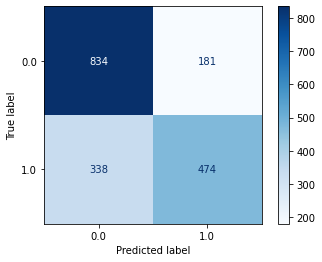

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_feat1, X_test, y_test,cmap=plt.cm.Blues)  

# Model for visit interval: If patient will develop dementia, how long until then

In [ ]:
#framing it as a regression problem
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor()

In [ ]:
sub=df.loc[df.target==1]
res=sub.drop(['NEWINF','target','INBIRYR','visit_interval'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(res, sub['visit_interval'], test_size=0.35, random_state=1)
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

No signal

### Explore survival analysis

In [36]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv

In [37]:
y=Surv.from_dataframe('target', 'visit_interval', df)
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(['target', 'visit_interval'], axis=1), y, test_size=0.35, random_state=1)


In [38]:
rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train)

RandomSurvivalForest()

In [39]:
rsf.score(X_test, y_test)

0.674318620568155

In [40]:
#survival function and  risk score
surv = rsf.predict_survival_function(X_test)

surv_p=pd.Series(rsf.predict(X_test))

C:\Users\viceva\miniconda3\envs\AD\lib\site-packages\sksurv\ensemble\forest.py:529: FutureWarning: predict_survival_function will return an array of StepFunction instances in 0.14. Use return_array=True to keep the old behavior.
  FutureWarning)


In [41]:
#survival function in array form and  actual event times
survs = rsf.predict_survival_function(X_test, return_array=True)
times=rsf.event_times_


In [42]:
#dirty time step (does not reflect actual time). For fast plotting
time=np.arange(94, 427+94)

## Exploring survival metrics available

In [43]:
from sksurv.metrics import integrated_brier_score
integrated_brier_score(y_train, y_test, survs, time)# not implemented for trees in this library =( but worked!

0.15591940507143276

In [44]:
from sksurv.metrics import concordance_index_ipcw,cumulative_dynamic_auc
concordance_index_ipcw(y_train, y_test, survs[:,0])

(0.4743353828785667, 61691, 66838, 813714, 9023)

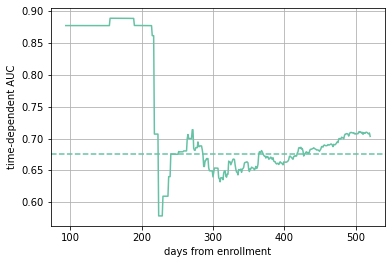

In [45]:
pred=rsf.predict(X_test) # only applicable for right-censored time-to-event data

va_auc, va_mean_auc = cumulative_dynamic_auc(y_train, y_test, pred, time)

plt.plot(time, va_auc)
plt.axhline(va_mean_auc, linestyle="--")
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [ ]:
for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.grid(True)
plt.legend()

In [ ]:
plt.step(rsf.event_times_, surv[0], where="post")

### To elucidate what features are important for the model, permutation is needed because feature importance is not implemented

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rsf, n_iter=10, random_state=1)
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.to_list())

output 'survival' probability with slider for time